In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Load Data

In [57]:
churn= pd.read_csv(r"Z:\226524\Datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Check Data Types

In [58]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Missing Values?

In [59]:
column_names = churn.columns
for column in column_names:
    print(column + ' - ' + str(churn[column].isnull().sum()))

customerID - 0
gender - 0
SeniorCitizen - 0
Partner - 0
Dependents - 0
tenure - 0
PhoneService - 0
MultipleLines - 0
InternetService - 0
OnlineSecurity - 0
OnlineBackup - 0
DeviceProtection - 0
TechSupport - 0
StreamingTV - 0
StreamingMovies - 0
Contract - 0
PaperlessBilling - 0
PaymentMethod - 0
MonthlyCharges - 0
TotalCharges - 0
Churn - 0


# Change datatype of Total Charges

In [60]:
churn.TotalCharges=pd.to_numeric(churn.TotalCharges,errors='coerce') 

# Data Visualization

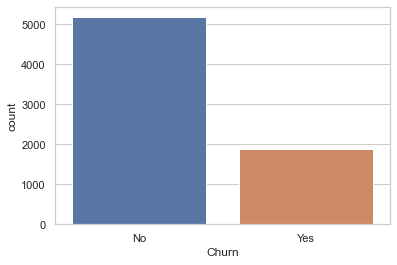

In [61]:
sns.countplot(x='Churn',data=churn);

High frequency of No as Churn

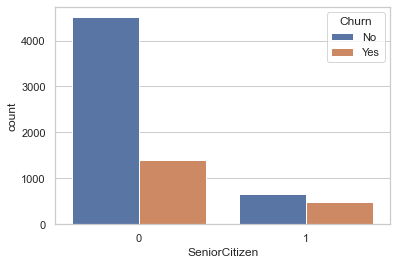

In [62]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=churn);

Senior Citizenship of a customer seems to affect Churn

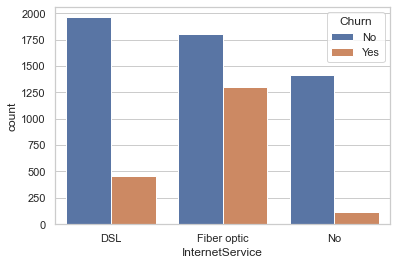

In [63]:
sns.countplot(x='InternetService',hue='Churn',data=churn);

Internet Service of a customer seems to affect Churn

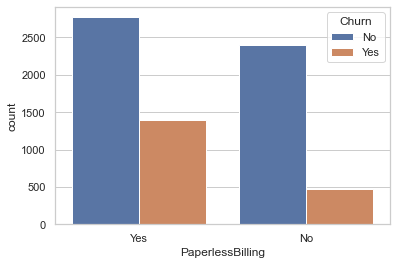

In [64]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=churn);

 Paperless Billing seems to affect Churn much

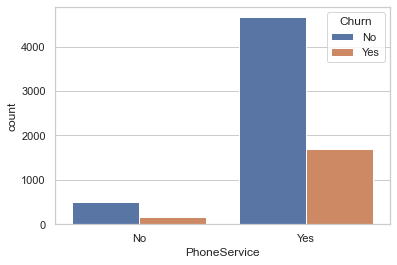

In [65]:
sns.countplot(x='PhoneService',hue='Churn',data=churn);

PhoneService seems to affect Churn

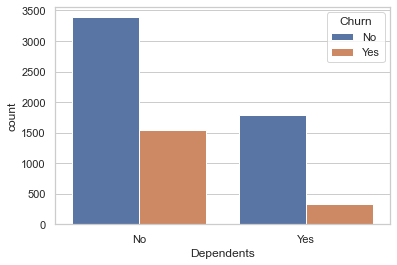

In [66]:
sns.countplot(x='Dependents',hue='Churn',data=churn);

Dependent seems to affect Churn

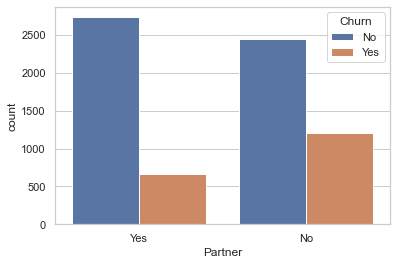

In [67]:
sns.countplot(x='Partner',hue='Churn',data=churn);

Partner doesn't seem to affect Churn much

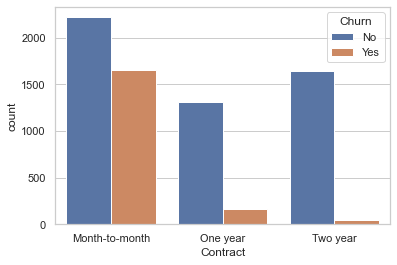

In [68]:
sns.countplot(x="Contract",hue='Churn',data=churn);

Seems that Contract affects the Churn

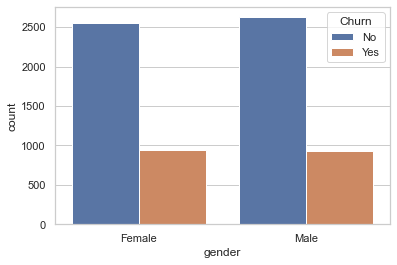

In [69]:
sns.countplot(x="gender",hue='Churn',data=churn);

Gender doesn't seem to affect Churn

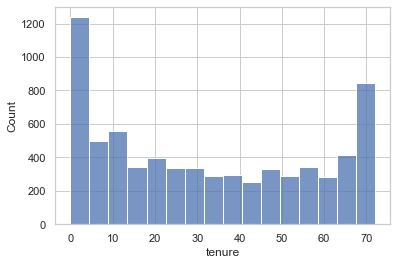

In [70]:
sns.histplot(data=churn,x='tenure');

Most customers are towards the extreme tenure value

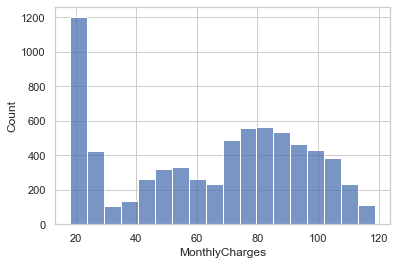

In [71]:
sns.histplot(data=churn,x='MonthlyCharges');

Most customers have low Monthly Charges 

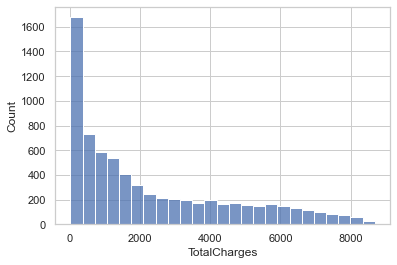

In [72]:
sns.histplot(data=churn,x='TotalCharges');

Most customers have low Total Charges

# Create Dummy Variables

In [73]:
churn=pd.get_dummies(churn,columns=['SeniorCitizen','InternetService','PaperlessBilling','PhoneService','Dependents','Contract','Churn'])
churn

,customerID,gender,Partner,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaperlessBilling_Yes,PhoneService_No,PhoneService_Yes,Dependents_No,Dependents_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,7590-VHVEG,Female,Yes,1,No phone service,No,Yes,No,No,No,...,1,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,Male,No,34,No,Yes,No,Yes,No,No,...,0,0,1,1,0,0,1,0,1,0
2,3668-QPYBK,Male,No,2,No,Yes,Yes,No,No,No,...,1,0,1,1,0,1,0,0,0,1
3,7795-CFOCW,Male,No,45,No phone service,Yes,No,Yes,Yes,No,...,0,1,0,1,0,0,1,0,1,0
4,9237-HQITU,Female,No,2,No,No,No,No,No,No,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,24,Yes,Yes,No,Yes,Yes,Yes,...,1,0,1,0,1,0,1,0,1,0
7039,2234-XADUH,Female,Yes,72,Yes,No,Yes,Yes,No,Yes,...,1,0,1,0,1,0,1,0,1,0
7040,4801-JZAZL,Female,Yes,11,No phone service,Yes,No,No,No,No,...,1,1,0,0,1,1,0,0,1,0
7041,8361-LTMKD,Male,Yes,4,Yes,No,No,No,No,No,...,1,0,1,1,0,1,0,0,0,1


In [74]:
y=['Churn_Yes']
X=['InternetService_No','PaperlessBilling_Yes','PhoneService_Yes','Dependents_Yes','Contract_Month-to-month','Contract_One year','tenure','MonthlyCharges','TotalCharges']

In [77]:
pd.DataFrame(churn[X])

,InternetService_No,PaperlessBilling_Yes,PhoneService_Yes,Dependents_Yes,Contract_Month-to-month,Contract_One year,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,1,29.85,29.85
1,0,0,1,0,0,1,34,56.95,1889.50
2,0,1,1,0,1,0,2,53.85,108.15
3,0,0,0,0,0,1,45,42.30,1840.75
4,0,1,1,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,1,24,84.80,1990.50
7039,0,1,1,1,0,1,72,103.20,7362.90
7040,0,1,0,1,1,0,11,29.60,346.45
7041,0,1,1,0,1,0,4,74.40,306.60


# Predictors

In [108]:
x=np.array(churn[X])[:,:-1]
x

array([[  0.  ,   1.  ,   0.  , ...,   0.  ,   1.  ,  29.85],
       [  0.  ,   0.  ,   1.  , ...,   1.  ,  34.  ,  56.95],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   2.  ,  53.85],
       ...,
       [  0.  ,   1.  ,   0.  , ...,   0.  ,  11.  ,  29.6 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   4.  ,  74.4 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  66.  , 105.65]])

# Dependent Variable

In [109]:
y=np.array(churn['Churn_Yes'])
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

# Training and Testing data

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [111]:
x_train

array([[ 0.  ,  1.  ,  1.  , ...,  0.  ,  9.  , 72.9 ],
       [ 0.  ,  1.  ,  1.  , ...,  0.  , 14.  , 82.65],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 64.  , 47.85],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  0.  , 58.  , 20.75],
       [ 0.  ,  1.  ,  1.  , ...,  0.  ,  1.  , 69.75],
       [ 1.  ,  0.  ,  1.  , ...,  0.  ,  4.  , 20.4 ]])

# Logistic Regression

In [112]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [114]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [115]:
model.intercept_  #Intercept term

array([-2.92142627])

In [116]:
model.coef_  #Coefficients

array([[ 0.25179082,  0.41486601, -0.97780936, -0.35172327,  1.75303139,
         0.64199989, -0.03983455,  0.0329872 ]])

# Accuracy

In [105]:
model.score(x_train,y_train)

0.7955375253549696

Accuracy of logistic regression classifier on training set: 0.7955375253549696

In [106]:
model.score(x_test,y_test)

0.7917652626597255

Accuracy of logistic regression classifier on test set: 0.9777777777777777

Since the two sets of regression models have more or less similar accuracy both quite high, it is a good model.

# Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,model.predict(x_test) )
print(confusion_matrix)

[[1388  172]
 [ 268  285]]


The result is telling us that we have 1388+285=1673 correct predictions and 172+268=440 incorrect predictions.

# Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1560
           1       0.62      0.52      0.56       553

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# ROC Curve

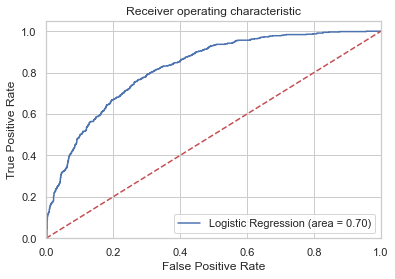

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()